# COM761 Machine Learning Coursework 1
### 2022/23

**<font color=red>Deadline: 12:00 noon, Friday 4th November 2022</font>**

**<font color=red>This is an individual assignment: University regulations on plagiarism will apply.</font>**

**This piece of CW is worth 40\% of your overall mark for COM761.**
  
**The total number of marks available in this assignment is 40.**

**Enter your solutions directly into this Jupyter notebook.**

For each question, you should provide your answer **in the cell immediately below the question**.

If a question requires a **numerical answer**, your cell should include python code carrying out the relevant calculations, and include a `print` statement to make clear what your answer to the question is. 

If a question requires a **graphical plot**, your cell should include python code that results in the required plot being printed to screen.

**You need to submit BOTH of the following via Blackboard before the deadline:**
  1. **This Jupyter notebook (containing your solutions), AND**
  2. **A pdf of this Jupyter notebook (containing your solutions).**
  
 You can convert your Jupyter notebook to pdf by:
 - printing directly from your browser to pdf
 - if the above does not work in your browser, go to File-> Download As... -> HTML (.html). Then open the html file in Google chrome, and print from chrome to pdf.

# Question 1 
### Application of Multiple Linear Regression
#### Total marks for question: 10

Download `physical.txt` from http://www.statsci.org/data/oz/physical.html

(Note that the first row of this text file contains header information, i.e. the names of the variables.)

Throughout this question, you can use functions from `scikit-learn`.

**Use all the data for training - you do not need to construct a validation set.**

**(a)** Build a least squares multiple linear regression model to predict *mass* from the other ten attributes (*fore*, *bicep*, etc). Print out the weights (coefficients and intercept) for the model. **[2 marks]**

**(b)** Suppose you wish to reduce your model down to using only *one* feature $x$. Use recursive feature elimination from scikit-learn to determine which feature you should use.  **[2 marks]**

**(c)** Using the feature $x$ from **(b)**, construct a polynomial regression model of the form: 

\begin{equation}
 f(\mathbf{x}) = w_0 + w_1 x + w_2 x^2
\end{equation}

Print out the weights for this model. **[3 marks]**

**(d)** Plot the polynomial regression model from **(c)**. **[3 marks]**


In [2]:
## Enter code for part (a) below [2 marks]

# Importing relevant modules
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn import metrics

# Downloading the data (phy_Data) from the physical.txt file
phy_Data = np.loadtxt('physical.txt', skiprows=1)

x = phy_Data[:,1:]      # Slicing the other 10 features
y = phy_Data[:,0]       # Slicing the target feature (mass)

mult_lin_reg_model = LinearRegression()          # the multiple linear regression model
mult_lin_reg_model.fit(x,y)                      # fitting the model to the data


print('The model weights are:')
print('Coefficients: =\n', mult_lin_reg_model.coef_)
print('Intercept (w0) =\n', mult_lin_reg_model.intercept_)

The model weights are:
Coefficients: =
 [ 1.78181867  0.1550904   0.18913544 -0.48183705 -0.02931235  0.66144124
  0.31784645  0.44589018  0.29721231 -0.91956267]
Intercept (w0) =
 -69.51713511860504


In [4]:
## Enter code for part (b) below [2 marks]

# Importing Recursive Feature Elimination (RFE) and Support Vector Regression (SVR) from sklearn
from sklearn.feature_selection import RFE
from sklearn.svm import SVR

reg_estimator = SVR(kernel="linear")      # reg_estimator represents SVR estimator
preferred_feature = RFE(reg_estimator, n_features_to_select=1, step=1)  # Selecting one feature only
preferred_feature = preferred_feature.fit(x,y)
preferred_feature.support_         # The output is a boolean array indicating (True) for 'forearm' as the selected feature

array([ True, False, False, False, False, False, False, False, False,
       False])

In [5]:
## Enter code for part (c) below [3 marks]

# Importing 'Polynomial Features' for polynomial regression model
from sklearn.preprocessing import PolynomialFeatures

feature_x = phy_Data[:,1][:,None]      # 'feature_x represents 'forearm' '
y_poly = phy_Data[:,0][:,None]         # 'y_poly' represents 'mass' as the target feature 

poly = PolynomialFeatures(degree = 2)
X = poly.fit_transform(feature_x)

poly.fit(X, y_poly)
lin_model2 = LinearRegression()
lin_model2.fit(X, y_poly)
print('Weights of  the model =\n', lin_model2.coef_)
print('Intercept (w0) =\n', lin_model2.intercept_)

Weights of  the model =
 [[  0.         -19.94154645   0.45492884]]
Intercept (w0) =
 [275.26547107]


In [9]:
## Alternatively, using the np.poly1d method from numpy
poly_x = phy_Data[:,1]
poly_y = phy_Data[:,0]
np_polyModel = np.poly1d(np.polyfit(poly_x, poly_y, 2))

print('Model Weights =\n',np_polyModel.c)

Model Weights =
 [  0.45492884 -19.94154645 275.26547107]


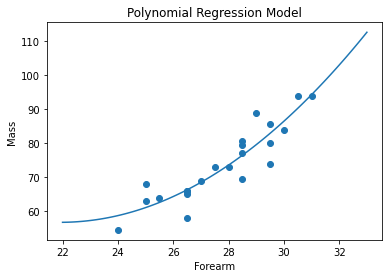

In [10]:
## Enter code for part (d) below [3 marks]

poly_x_axis = np.linspace(22, 33, 100)

plt.scatter(feature_x, y_poly)
plt.xlabel('Forearm')
plt.ylabel('Mass')
plt.title('Polynomial Regression Model')
plt.plot(poly_x_axis, np_polyModel(poly_x_axis))
plt.show()

# Question 2
### The Normal Equation for Multiple Least Squares Linear Regression
#### Total marks for question: 10

The optimal coefficients for a least squares linear regression model $f(\mathbf{x}) = \mathbf{w}^T\mathbf{x}$ can be derived analytically, by differentiating the mean squares cost function with respect to the weight and setting the derivative equal to zero [1].

Doing this, the vector $\hat{\mathbf{w}}$ of weights that minimizes the mean squares cost function is given by the *normal equation*:

\begin{equation}\hat{\mathbf{w}} = (\mathbf{X}^T\mathbf{X})^{-1}\mathbf{X}^T\mathbf{y}\end{equation}

where $\mathbf{X} = \begin{bmatrix} \mathbf{x}_1^T \\ \mathbf{x}_2^T \\ \vdots \\ \mathbf{x}_N^T  \end{bmatrix} = \begin{bmatrix} 1 & x_1^{(1)} & x_2^{(1)} & \ldots & x_n^{(1)} \\ 1 & x_1^{(2)} & x_2^{(2)} & \ldots & x_n^{(2)} \\ \vdots & \vdots & \vdots & \ddots & \vdots \\ 1 & x_1^{(N)} & x_2^{(N)} & \ldots & x_n^{(N)}   \end{bmatrix}$

where $x_{i}^{(j)}$ is the $i$-th feature of example $j$.

In this question, you are going to calculate the weights for the multiple linear regression model in Q1 (a), using the normal equation above.

**(a)** Using the data in `physical.txt`, construct a vector $\mathbf{y}$ that contains the values of *mass*, and a matrix $\mathbf{X}$ that contains the values of the other ten attributes (*fore*, *bicep*, etc) for $x_i$ ($1 \le i \le 10$). **[3 marks]**

**(b)** Write code to calculate the optimal weight vector $\mathbf{\hat{w}}$ from the normal equation above. **[5 marks]**

**(c)** Print the value of $\mathbf{\hat{w}}$ to screen, and compare to the weights you obtained using `scikit-learn` for this model in Q1 (a) (i.e. are they the same or not?) **[2 marks]**


[1] pp. 9-14, 22-27 of *A First Course in Machine Learning*, 2nd Edition.

In [12]:
## Enter code for part (a) below [3 marks]

# Matrix containing the values of the other 10 features
x = phy_Data[:,1:]
print('Matrix of 10 features:\n', x)

# Vector containing the values of Mass
y = phy_Data[:,0]
print('Vector of Mass values:\n', y)


Matrix of 10 features:
 [[ 28.5  33.5 100.   38.5 114.   85.  178.   37.5  53.   58. ]
 [ 29.5  36.5 107.   39.  119.   90.5 187.   40.   52.   59. ]
 [ 25.   31.   94.   36.5 102.   80.5 175.   33.   49.   57. ]
 [ 28.5  34.  104.   39.  114.   91.5 183.   38.   50.   60. ]
 [ 28.5  36.5 107.   39.  114.   92.  174.   40.   53.   59. ]
 [ 30.5  38.  112.   39.  121.  101.  180.   39.5  57.5  59. ]
 [ 26.5  29.   93.   35.  105.   76.  177.5  38.5  50.   58.5]
 [ 27.   31.   95.   37.  108.   84.  182.5  36.   49.   60. ]
 [ 26.5  29.   93.   35.  112.   74.  178.5  34.   47.   55.5]
 [ 26.5  31.   96.   35.  103.   76.  168.5  35.   46.   58. ]
 [ 28.5  37.  109.5  39.  118.   80.  170.   38.   50.   58.5]
 [ 27.5  33.  102.   38.5 113.   86.  180.   36.   49.   59. ]
 [ 29.5  36.  101.   38.5 115.5  82.  186.5  38.   49.   60. ]
 [ 25.   30.   98.5  37.  108.   82.  188.   37.   49.5  57. ]
 [ 29.5  36.  103.   40.  117.   95.5 173.   37.   52.5  58. ]
 [ 26.5  32.5  89.   35.  104.5

In [14]:
## Enter code for part (b) below [5 marks]

X = np.c_[(np.ones((22,1)),x)]      # Concatenating a column of 1s with x 
print('X with column of 1s:\n', X)

w_vector = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)   # Codes implementing the optimal weights of the normal equation

X with column of 1s:
 [[  1.   28.5  33.5 100.   38.5 114.   85.  178.   37.5  53.   58. ]
 [  1.   29.5  36.5 107.   39.  119.   90.5 187.   40.   52.   59. ]
 [  1.   25.   31.   94.   36.5 102.   80.5 175.   33.   49.   57. ]
 [  1.   28.5  34.  104.   39.  114.   91.5 183.   38.   50.   60. ]
 [  1.   28.5  36.5 107.   39.  114.   92.  174.   40.   53.   59. ]
 [  1.   30.5  38.  112.   39.  121.  101.  180.   39.5  57.5  59. ]
 [  1.   26.5  29.   93.   35.  105.   76.  177.5  38.5  50.   58.5]
 [  1.   27.   31.   95.   37.  108.   84.  182.5  36.   49.   60. ]
 [  1.   26.5  29.   93.   35.  112.   74.  178.5  34.   47.   55.5]
 [  1.   26.5  31.   96.   35.  103.   76.  168.5  35.   46.   58. ]
 [  1.   28.5  37.  109.5  39.  118.   80.  170.   38.   50.   58.5]
 [  1.   27.5  33.  102.   38.5 113.   86.  180.   36.   49.   59. ]
 [  1.   29.5  36.  101.   38.5 115.5  82.  186.5  38.   49.   60. ]
 [  1.   25.   30.   98.5  37.  108.   82.  188.   37.   49.5  57. ]
 [  1.   29.

In [15]:
## Enter code and comment for part (c) below [2 marks]

print('Optimal Weight vector using Normal Equation:\n', w_vector)

# Comment: Comparing these normal equation weights with the weights from Q1(a) shows that they are the same

Optimal Weight vector using Normal Equation:
 [-6.95171351e+01  1.78181867e+00  1.55090402e-01  1.89135439e-01
 -4.81837053e-01 -2.93123483e-02  6.61441244e-01  3.17846448e-01
  4.45890184e-01  2.97212313e-01 -9.19562670e-01]


# Question 3
### Experiments with Random search
#### Total marks for question: 10

In this question, you will use the `random_search` algorithm introduced in the lectures. The code is already provided in the cell below.

**(a)** Write a function called `booth` that implements the *Booth function*:

\begin{equation}
g(x_1,x_2) = (x_1 + 2x_2 - 7)^2 +(2x_1 + x_2 - 5)^2
\end{equation}

This function should take in a numpy column vector representing $\mathbf{x} = \begin{bmatrix} x_1 \\ x_2 \end{bmatrix}$ and return the value of $g(x_1,x_2)$. **[2 marks]**

**(b)** Amend the `random_search` function to implement another option for `alpha_choice` called `decay`.  In this setting, alpha should be set to $\alpha = e^{-k/5}$, where $e = 2.718281828\ldots$ is the natural base. **[2 marks]**

**(c)** Perform an experiment to investigate the effect of `alpha_choice` when optimizing the Booth function with the following settings:
- Number of steps $K=50$
- Number of random directions at each step $P=1000$  
- Initial point $\mathbf{w}^0 = \begin{bmatrix} -2 \\ -2 \end{bmatrix}$

You should investigate three settings for $\alpha$: fixed steplength of $\alpha = 1$, 'diminishing' and 'decay'.

Show the results from your experiments by plotting (on the same figure) the cost history (i.e. history of objective function values) against iteration number for the three settings of the random search. **[4 marks]**

**(d)** Comment on the worst performing setting of the random search in **(c)**, giving an explanation of why it does not perform as well as the other two settings. **[2 marks]**




In [17]:
## Enter code for part (a) below [2 marks]

def booth(x):
    return ((x[0]+(2*x[1])-7)**2) + (((2*x[0])+x[1]-5)**2)

# random search function - ammend for part (b) [2 marks]

import math     # To implement natural base function

def random_search(g,alpha_choice,max_its,w,num_samples):
    # run random search
    weight_history = []         # container for weight history
    cost_history = []           # container for corresponding cost function history
    alpha = 0
    for k in range(1,max_its+1):        
        # check if diminishing steplength rule used
        if alpha_choice == 'diminishing':
            alpha = 1/float(k)
        elif alpha_choice == 'decay':
            alpha = math.exp(float(-k)/5)
        else:
            alpha = alpha_choice
            
        # record weights and cost evaluation
        weight_history.append(w.T)
        cost_history.append(g(w.T))
        
        # construct set of random unit directions
        directions = np.random.randn(num_samples,np.size(w))
        norms = np.sqrt(np.sum(directions*directions,axis = 1))[:,np.newaxis]
        directions = directions/norms   
        
        ### pick best descent direction
        # compute all new candidate points
        w_candidates = w + alpha*directions
        
        # evaluate all candidates
        evals = np.array([g(w_val.T) for w_val in w_candidates])

        # if we find a real descent direction take the step in its direction
        ind = np.argmin(evals)
        if g(w_candidates[ind]) < g(w.T):
            # pluck out best descent direction
            d = directions[ind,:]
        
            # take step
            w = w + alpha*d
        
    # record weights and cost evaluation
    weight_history.append(w.T)
    cost_history.append(g(w.T))
    return weight_history,cost_history

w_init = np.array([[0,0]])

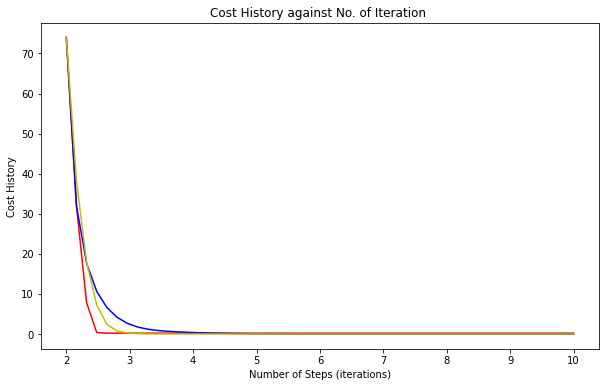

In [18]:
# Enter code for part (c) below [4 marks]

# Investigating 3 settings for alpha using P = 1000, k = 50, and w = (0,0)
wt_fx, fixed_alpha = random_search (g=booth,alpha_choice=1, max_its=50, w = w_init, num_samples = 1000)
wt_dm, dmnshg_alpha = random_search (g=booth,alpha_choice='diminishing', max_its=50, w = w_init, num_samples = 1000)
wt_dy, decay_alpha = random_search (g=booth,alpha_choice='decay', max_its=50, w = w_init, num_samples = 1000)

iterations = np.linspace(2,10,51)
plt.figure(figsize=(10,6))
plt.plot(iterations,fixed_alpha, '-r')
plt.plot(iterations,dmnshg_alpha, '-b')
plt.plot(iterations,decay_alpha, '-y')
plt.xlabel('Number of Steps (iterations)')
plt.ylabel('Cost History')
plt.title('Cost History against No. of Iteration ')
plt.show()

#Enter comment below for part (d); or alternatively type your answer into a new markdown cell

## Comment
The worst performing alpha setting is the fixed step-lenght setting (alpha = 1, shown with colour red in the graph)
because it failed to use the diminishing step-lenght rule which shrinks the steplenght at every iteration in order to
control the lenght of descent to the optimal weight that minimises the cost function [1]


# Question 4
### Implementation of Mean Absolute Deviations Linear Regression
#### Total marks for question: 10

In the cell below you are given:
- data stored in `x4` (feature) and `y4` (label)
- code to compute the least squares cost function using this data
- code for training a least squares linear regression model using this data

**(a)** Implement code for the *Mean Absolute Deviation* (MAD) cost function, given by: 

$\textrm{MAD}(\mathbf{w}) = \frac{1}{N}\sum_{i=1}^N |y_i - \textrm{model}(x_i,\mathbf{w})|$

where $N$ is the number of examples we are training from. **[3 marks]**

**(b)** Use the random search algorithm from Q3 to find the weights $w_0, w_1$ that optimize the Mean Absolute Deviation for a simple linear regression model trained on the data stored in `x4` and `y4`. Print the values of the optimal model weights found using MAD. (Other than cost function, you should keep the settings passed to `random_search` the same as those used below for the least squares model). **[2 marks]**

**(c)** On the same figure, plot the MAD model and the least-squares model (as well as the data), and comment on the cause of the difference in models. **[5 marks]**


In [19]:
## Data for use in Q4
x4 = np.array([[-0.372180347],[-0.630104555],[-1.150723051],[0.933616921],[-0.831975033],
              [-1.656988490],[1.124082010],[-0.393019792],[-0.732695333],[0.452214528]])
y4 = np.array([[-1.174803460],[-1.856390758],[-2.256630546],[-9.994548305],[-1.710868702],
             [-2.682265692],[0.191515393],[-1.247013155],[-1.684018106],[-0.624466506]])

# Code provided for Q4
def model(x,w):
    a = w[0] + w[1]*x[0]
    return a

def least_squares(w):
    cost = 0
    for i in range(len(x4)):
        cost += (model(x4[i],w)-y4[i])**2

    return cost/float(np.size(y4))

# the next two lines find the optimal weights for the simple linear regression model using mean squared error
w_init = np.array([[0,0]])
wh_MSE,sh1_MSE = random_search(g=least_squares,alpha_choice='diminishing',max_its=50,w=w_init,num_samples=1000)
print('model parameters found using least squares:',wh_MSE[-1])

## Enter code for part (a) below [3 marks]

def mean_abs_devtn(w):
    cost_mad = 0
    for i in range(len(x4)):
        cost_mad += abs(model(x4[i],w)-y4[i])
    
    return cost_mad/float(np.size(y4))


## Enter code for part (b) below [2 marks]

w_init = np.array([[0,0]])
wt_MAD, s1_MAD = random_search(g=mean_abs_devtn,alpha_choice='diminishing',max_its=50,w=w_init,num_samples=1000)
print('The MAD model weights are:', wt_MAD[-1])

model parameters found using least squares: [[-2.53612839]
 [-0.70764362]]
The MAD model weights are: [[-0.98036366]
 [ 1.02763798]]


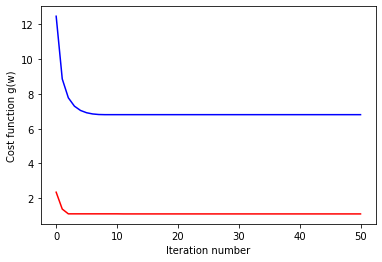

In [20]:
## Enter code and comment for part (c) below [5 marks]

x_its = np.arange(0,51)
plt.plot(x_its[0:],s1_MAD[0:],'-r')       # Mean absolute deviation plot
plt.plot(x_its[0:],sh1_MSE[0:], '-b')     # Least squares plot
plt.xlabel('Iteration number')
plt.ylabel('Cost function g(w)')
plt.show()



### Comment on the graph
The difference in the MAD model and Least squares model is because the Absolute Error approach (MAD) minimizes the effect
of large errors on model (error due to outliers); that is, more robust than the Least squares approach in searching for optimal weight that minimizes the loss function. [1]

## Reference

[1] Hawe, G 2022, Learning Materials Week Three: Optimization 1, lecture slides, 
    Machine Learning COM761, Ulster University, delivered 13 October 2022.